In [1]:
%load_ext autoreload
%autoreload 2
%env WANDB_SILENT=true

from pathlib import Path
from copy import deepcopy
import matplotlib.pyplot as plt
import pandas as pd
import quantstats as qs
import os
import logging
import sys


# Filter logs to only print from `nbtools`
class NbFilter(logging.Filter):
    def filter(self, record):
        return "nbtools" in record.getName()

logger = logging.getLogger("freqtrade.nbtools")
handler = logging.StreamHandler(stream=sys.stdout)
handler.setFormatter(logging.Formatter("%(name)s - %(message)s"))
logger.addHandler(handler)
# logger.addFilter(NbFilter())
logger.setLevel(logging.INFO)

qs.extend_pandas()
plt.style.use("seaborn-whitegrid")
pd.set_option('display.max_rows', 200)

if "freqtrade" not in os.listdir():
    import nest_asyncio
    nest_asyncio.apply()
    os.chdir("..")

PATH_MOUNT = Path.cwd().parent / "mount"
print("Working Directory:", os.getcwd())

# Freqtrade Imports
from freqtrade.optimize.optimize_reports import text_table_add_metrics
from freqtrade.nbtools.preset import LocalPreset
from freqtrade.nbtools.backtest import backtest
from freqtrade.nbtools import plotting

env: WANDB_SILENT=true
Working Directory: C:\CS\Python\crypto-collection\freqtrade\superft


In [23]:
LOCAL_PRESET_NAME = "15m-next30m-combine"
TIMERANGE = "20210501-20210801"

PATH_LOCAL_PRESET = PATH_MOUNT / "presets" / LOCAL_PRESET_NAME
PATH_LOCAL_DATADIR = PATH_MOUNT / "data"

preset = LocalPreset(
    path_local_preset=PATH_LOCAL_PRESET,
    path_data=PATH_LOCAL_DATADIR,
    timerange=TIMERANGE
)

stats, summary = backtest(preset, preset.default_strategy_code)
trades = pd.DataFrame(stats["strategy"]["NotebookStrategy"]["trades"])

freqtrade.nbtools.preset.base_preset - Setting config for 15m-next30m-combine ...
freqtrade.nbtools.preset.base_preset - Setting arg `datadir` to C:\CS\Python\crypto-collection\freqtrade\mount\data\binance
freqtrade.nbtools.preset.base_preset - Setting arg `timerange` to 20210501-20210801
freqtrade.nbtools.backtest - Backtesting...
freqtrade.nbtools.backtest - Strategy using minimal_roi: {'30': -1000}
freqtrade.nbtools.backtest - Strategy using timeframe: 15m
freqtrade.nbtools.backtest - Strategy using stoploss: -0.99
freqtrade.nbtools.backtest - Strategy using trailing_stop: False
freqtrade.nbtools.backtest - Strategy using trailing_stop_positive_offset: 0.0
freqtrade.nbtools.backtest - Strategy using trailing_only_offset_is_reached: False
freqtrade.nbtools.backtest - Strategy using use_custom_stoploss: False
freqtrade.nbtools.backtest - Strategy using process_only_new_candles: False
freqtrade.nbtools.backtest - Strategy using order_types: {'buy': 'limit', 'sell': 'limit', 'forcesell'

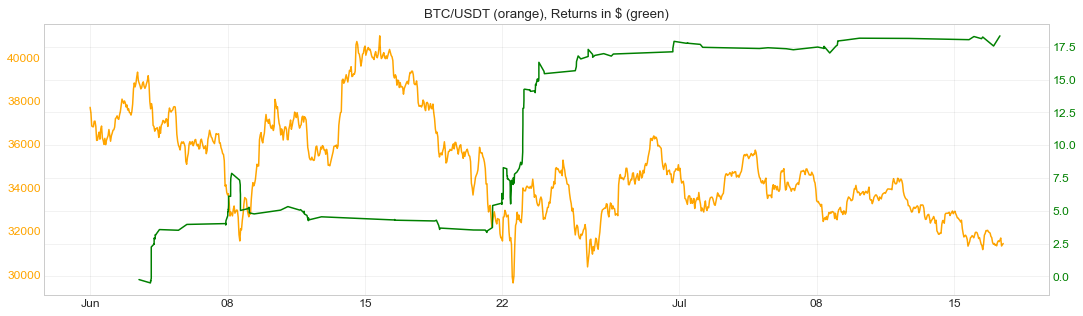

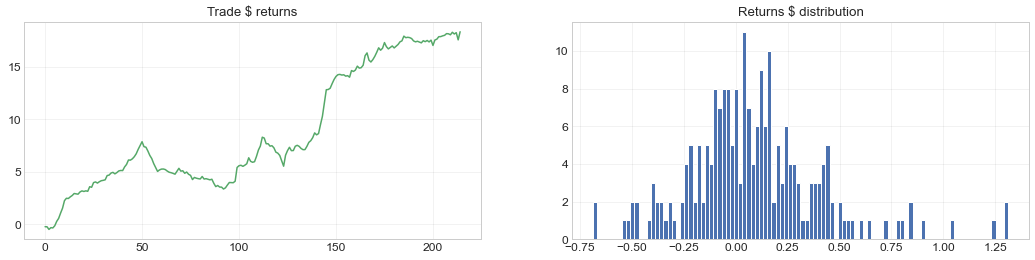

,Portfolio Summary
Min Balance,-0.50
Max Balance,18.34
End Balance,18.34
Trades,215.00
Avg. Profit %,0.57
Avg. Profit $,0.09
Biggest Profit $,1.31
Biggest Loss $,-0.69


In [26]:
plotting.plot_profits(
    trades,
    start = "2021-06-01",
    end = "2021-08-01",
    path_mount = PATH_MOUNT
)

In [25]:
# Running this cell will print backtest results
results = deepcopy(stats["strategy"]["NotebookStrategy"])

# Results per pair
results_per_pair = pd.DataFrame(results["results_per_pair"])
results_per_pair_df = results_per_pair.set_index("key").drop(columns=["profit_mean", "profit_total", "profit_sum"])
results_per_pair_df = results_per_pair_df.sort_values(by=["profit_total_abs"], ascending=False)
results_per_pair_df.round(2)

# Sell reason stats
sells = pd.DataFrame(results['sell_reason_summary'])
sells = sells.drop(columns=["profit_mean", "profit_total"]).set_index("sell_reason")

# Left open trades
left_open_trades = pd.DataFrame(results['left_open_trades'])
left_open_trades = left_open_trades.drop(columns=["profit_mean", "profit_total", "profit_sum"]).set_index("key")

# Summary metrics
metrics = text_table_add_metrics(results)
advanced_metrics = deepcopy(stats["metadata"])
advanced_metrics["profit_mean"] = advanced_metrics["profit_mean"] * 100
advanced_metrics["profit_median"] = advanced_metrics["profit_median"] * 100
advanced_metrics["profit_total"] = advanced_metrics["profit_total"] * 100

for key in list(advanced_metrics):
    value = advanced_metrics[key]
    valid = any(isinstance(value, it) for it in [str, int, float, bool])
    
    if not valid:
        del advanced_metrics[key]
        continue
    
    if isinstance(value, float):
        advanced_metrics[key] =  round(value, 3)
    
    advanced_metrics[key] = [advanced_metrics[key]]
    
advanced_metrics_df = pd.DataFrame(advanced_metrics)
    
print("Results Per Pair")
display(results_per_pair_df.round(2))
print("Sell Reasons")
display(sells.round(2))
print("Left Open Trades")
display(left_open_trades.round(2))
print("Freqtrade Summary Metrics")
print("=" * 48 + "\n" + metrics + "\n" + "=" * 48)
print("Advanced Metrics")
print("Preset Name:", advanced_metrics_df["preset_name"][0])
display(advanced_metrics_df.drop(columns=["preset_name"]).T)

Results Per Pair


,trades,profit_mean_pct,profit_sum_pct,profit_total_abs,profit_total_pct,duration_avg,wins,draws,losses
key,,,,,,,,,
TOTAL,815,0.57,464.62,69.76,6.98,0:36:00,526,0,289
DOT/USDT,21,2.09,43.81,6.58,0.66,0:33:00,14,0,7
THETA/USDT,16,2.60,41.65,6.25,0.63,0:32:00,13,0,3
VET/USDT,21,1.74,36.63,5.50,0.55,0:31:00,17,0,4
DOGE/USDT,26,1.22,31.71,4.76,0.48,0:41:00,15,0,11
ADA/USDT,10,2.87,28.72,4.31,0.43,0:48:00,10,0,0
KSM/USDT,37,0.77,28.57,4.29,0.43,0:37:00,23,0,14
QTUM/USDT,18,1.33,23.88,3.58,0.36,0:38:00,11,0,7
TFUEL/USDT,11,1.80,19.81,2.97,0.30,0:33:00,8,0,3


Sell Reasons


,trades,wins,draws,losses,profit_mean_pct,profit_sum,profit_sum_pct,profit_total_abs,profit_total_pct
sell_reason,,,,,,,,,
roi,815,526,0,289,0.57,4.65,464.62,69.76,77.44


Left Open Trades


,trades,profit_mean_pct,profit_sum_pct,profit_total_abs,profit_total_pct,duration_avg,wins,draws,losses
key,,,,,,,,,
TOTAL,0,0.0,0.0,0.0,0.0,0:00,0,0,0


Freqtrade Summary Metrics
| Metric                 | Value               |
|------------------------+---------------------|
| Backtesting from       | 2021-05-01 00:00:00 |
| Backtesting to         | 2021-07-17 11:45:00 |
| Max open trades        | 6                   |
|                        |                     |
| Total/Daily Avg Trades | 815 / 10.58         |
| Starting balance       | 1000.000 USDT       |
| Final balance          | 1069.763 USDT       |
| Absolute profit        | 69.763 USDT         |
| Total profit %         | 6.98%               |
| Avg. stake amount      | 15.000 USDT         |
| Total trade volume     | 12225.000 USDT      |
|                        |                     |
| Best Pair              | DOT/USDT 43.81%     |
| Worst Pair             | SNX/USDT -20.21%    |
| Best trade             | DOT/USDT 15.02%     |
| Worst trade            | HNT/USDT -23.68%    |
| Best day               | 12.365 USDT         |
| Worst day              | -23.338 USDT    

,0
random_name,happy-vegeta-monitor
preset_type,LocalPreset
backtest_date,2021-07-20 22:42:44
leverage,1
direction,long
is_hedging,False
fee,0.001
num_pairs,64
data_source,binance
win_rate,0.645
